<a href="https://colab.research.google.com/github/cwy20030/Machine-Learning-Workshop/blob/master/Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import sklearn.metrics
import matplotlib.pyplot as plt
from copy import deepcopy
#import numpy.random.rand as rand
#rand.seed(int_value)

In [0]:
batch_size = 128 #4
num_classes = 10
epochs = 10

#1280 : 10 updates vs 1280 updates

#100 datapoints: SGD - update after every datapoint: 100 updates
#              : GD - update after 100 datapoints: 1 update
# Mini-batch SGD: 10 : update after 10 datapoints: 10 updates

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # xtrain = xtrain/255
x_test /= 255 
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_test_ = deepcopy(y_test)
#y_test_ = y_test

60000 train samples
10000 test samples


In [0]:
r_1 = [1,2,3]
r_2 = r_1
r_3 = deepcopy(r_1)
print('r_1',r_1)
print('r_2',r_2)
print('r_3',r_3)

r_1.remove(3)

print('r_1',r_1)
print('r_2',r_2)
print('r_3',r_3)

r_1 [1, 2, 3]
r_2 [1, 2, 3]
r_3 [1, 2, 3]
r_1 [1, 2]
r_2 [1, 2]
r_3 [1, 2, 3]


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#input = image_3
#target = 3
#[0,1,2,3,4,5,6,7,8,9]
#[0,0,0,1,0,0,0,0,0,0]

In [0]:
model = Sequential() # i(784) -W-> h1 (512) -drop 0.2 -> h2 (512) - -> o (10)  
# W*i
# h2 = W_hh * h1 dropouts: W_hh * dropped_out_h1
# pre_i = max(0, a_i) a_i = -0.1, 0.1
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
# r = random.rand() : (0,1)
# if r<0.2:
#  activated_i = 0
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) #[p_1,..,p_10] p_i >0 \sum p_i = 1

In [0]:
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0) #0.9829

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2596 - acc: 0.9198 - val_loss: 0.1143 - val_acc: 0.9622
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1138 - acc: 0.9656 - val_loss: 0.0931 - val_acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0863 - acc: 0.9738 - val_loss: 0.0888 - val_acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0711 - acc: 0.9787 - val_loss: 0.0714 - val_acc: 0.9806
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0604 - acc: 0.9816 - val_loss: 0.0770 - val_acc: 0.9799
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0550 - acc: 0.9840 - val_loss: 0.0752 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0512 - acc: 0.9851 - val_loss: 0.

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.095001053121928
Test accuracy: 0.9828


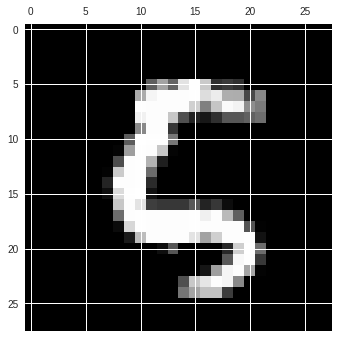

[[1.2846091e-10 3.5271627e-12 1.8550673e-09 2.9155723e-08 4.5990333e-08
  9.9994838e-01 2.2889315e-05 1.2995045e-09 1.3027214e-08 2.8657496e-05]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
image_index = 2000
plt.gray()
plt.matshow(x_train[image_index,:].reshape(28,28))
plt.show()
print(model.predict(x_train[image_index,:].reshape(1,784)))
print(y_train[image_index])

In [0]:
sklearn.metrics.confusion_matrix(y_test_,model.predict_classes(x_test))

array([[ 968,    1,    0,    1,    1,    2,    1,    1,    2,    3],
       [   0, 1126,    3,    0,    0,    1,    2,    0,    3,    0],
       [   3,    3, 1004,    3,    9,    0,    1,    5,    4,    0],
       [   0,    0,    6,  993,    0,    0,    0,    5,    2,    4],
       [   0,    1,    0,    0,  968,    0,    4,    2,    1,    6],
       [   2,    0,    0,   15,    1,  860,    5,    0,    7,    2],
       [   5,    3,    1,    1,    5,    6,  933,    0,    4,    0],
       [   1,    8,    7,    1,    0,    0,    0, 1001,    2,    8],
       [   1,    1,    3,    7,    2,    6,    0,    7,  944,    3],
       [   0,    7,    0,    5,    8,   10,    0,    5,    1,  973]])

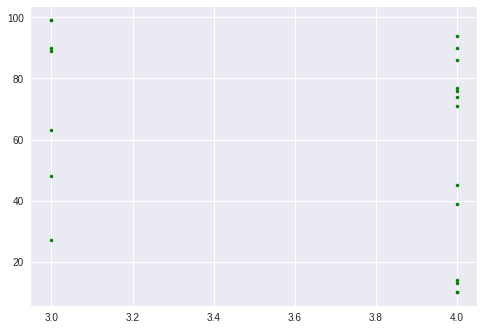

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(3,5,20)
y = np.random.randint(1,100,20)
#plt.plot(x,y,'g.')